# Global Temperature Analysis - Visualization
Abinash Patti

In [4]:
# Import libraries and summary statistics
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Load extreme temperature summary
df_summary_extreme_temps = pd.read_csv("../data/analysis/ExtremeTemperaturesByCountry.csv")

# Display info and head
df_summary_extreme_temps.info()
df_summary_extreme_temps.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      242 non-null    object 
 1   HottestYear  242 non-null    int64  
 2   HottestTemp  242 non-null    float64
 3   ColdestYear  242 non-null    int64  
 4   ColdestTemp  242 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.6+ KB


,Country,HottestYear,HottestTemp,ColdestYear,ColdestTemp
0,Afghanistan,1997,28.533,2008,-4.553
1,Africa,2010,27.126,1861,19.523
2,Albania,1757,25.843,1942,-2.049
3,Algeria,2003,35.829,1813,9.526
4,American Samoa,2003,28.543,1915,24.712


Text(0, 0.5, 'Country')

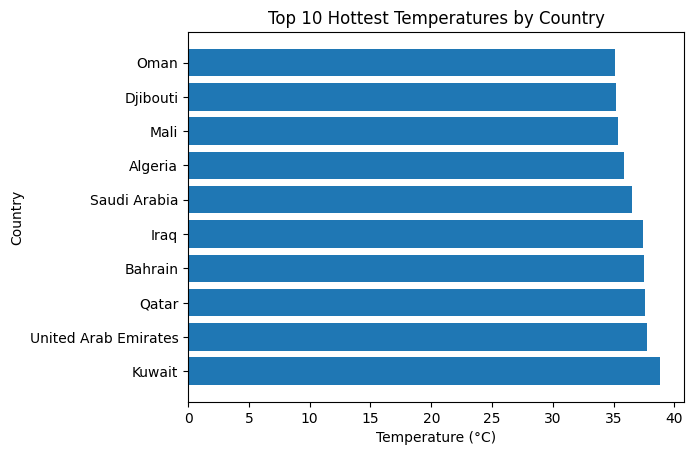

In [14]:
# Sort by hottest temp descending
df_summary_extreme_temps_sorted_top10 = df_summary_extreme_temps.sort_values(by="HottestTemp", ascending=False).head(10)

# Plot top 10 hottest temperatures by country
plt.barh(df_summary_extreme_temps_sorted_top10["Country"], df_summary_extreme_temps_sorted_top10["HottestTemp"])
plt.title("Top 10 Hottest Temperatures by Country")
plt.xlabel("Temperature (°C)")
plt.ylabel("Country")

Text(0, 0.5, 'Country')

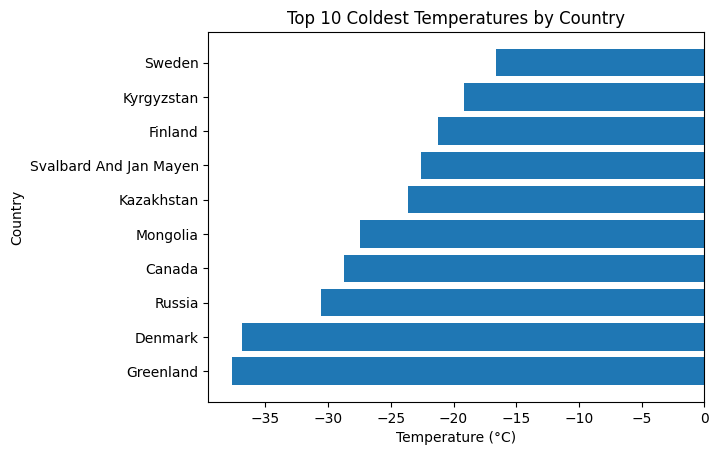

In [13]:
# Sort by coldest temp 
df_summary_extreme_temps_sorted_top10 = df_summary_extreme_temps.sort_values(by="ColdestTemp").head(10)

# Plot top 10 coldest temperatures by country
plt.barh(df_summary_extreme_temps_sorted_top10["Country"], df_summary_extreme_temps_sorted_top10["ColdestTemp"])
plt.title("Top 10 Coldest Temperatures by Country")
plt.xlabel("Temperature (°C)")
plt.ylabel("Country")